In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Distribute

In [203]:
n = 10000
pi = np.pi
x1 = np.random.uniform(0,1,n)
x2 = np.random.uniform(0,1,n)
y1 = np.sqrt(-2*np.log(x1))*np.cos(2*pi*x2)
y2 = np.sqrt(-2*np.log(x1))*np.sin(2*pi*x2)
xe1 = np.exp(-(1/2)*(y1*y1+y2*y2))
xe2 = (1/(2*pi))*np.arctan(y2/y1)

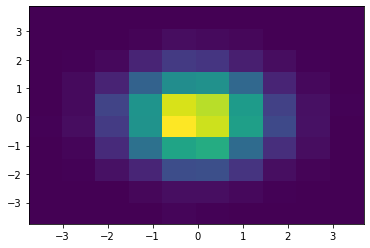

In [160]:
#plt.plot(x1,y2,'o')
#plt.plot( hy1,hx1[:-1], ',')
plt.hist2d(y1,y2)
#plt.ylim(0,1200)

plt.show()


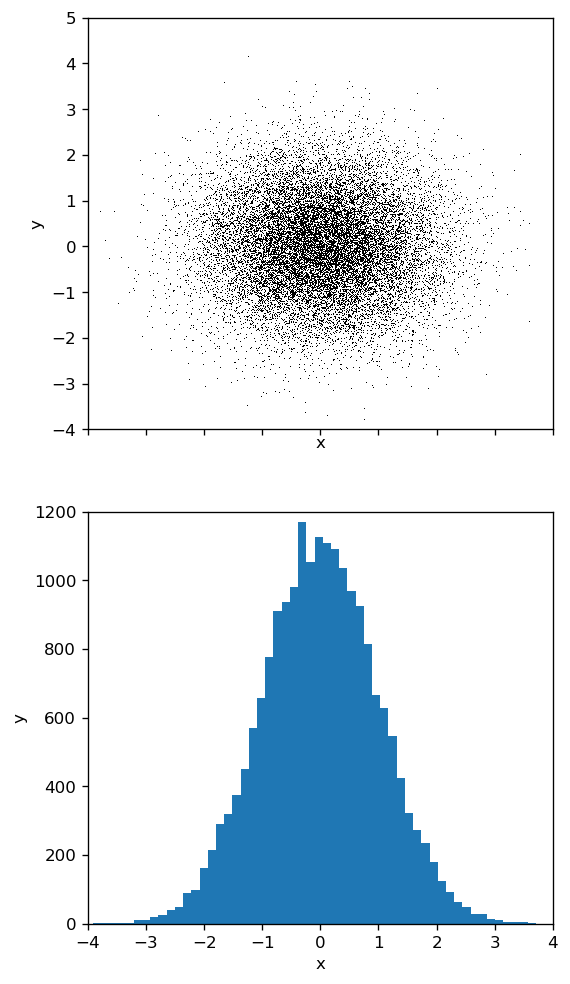

In [209]:
fig,ax=plt.subplots(2,1,sharex=True,figsize=(5,10),dpi=120)
fig.figsize=[200,10]
ax[0].plot(y1,y2,',k')
ax[0].plot(y2,y1,',k')
ax[0].set_ylim(-4,5)
ax[0].set_xlim(-4,4)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].hist(np.append(y1,y2),60)
ax[1].set_ylim(0, 1200)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
plt.savefig('GussDistribute.jpeg',dpi=200)
plt.show()


# LS

In [168]:
mcdata = pd.read_table('mcmc.txt',sep='  ')
xdata = np.array( mcdata.loc[:, 'x'])
ydata = np.array(mcdata.loc[:, 'y'])
dydata = np.array(mcdata.loc[:, 'dy'])
#print(mcdata)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


## OLS 

In [169]:
# ax+b=y   [x,1]T * [a,b]= [y]
def fun(x,coeff):
    return coeff[0]*x+coeff[1]

aMatrix=np.ones([15,2])
aMatrix[:,0] = xdata
atMatrix=aMatrix.T
xOLS = np.linalg.solve((np.dot(atMatrix,aMatrix)),np.dot(atMatrix,ydata))
print(xOLS)


[ 2.191028   32.00396939]


## WLS ##

In [170]:
aMatrix = np.ones([15, 2])
aMatrix[:, 0] = xdata
atMatrix = aMatrix.T
wMatrix = np.diag(1/(dydata*dydata))
xWLS = np.linalg.solve(np.dot(np.dot(atMatrix, wMatrix),aMatrix), np.dot(np.dot(atMatrix, wMatrix),ydata))
print(xWLS)


[ 2.23253622 34.84594131]


In [171]:
#方法2
aMatrix = np.ones([15, 2])
#tdydata=np.sqrt(dydata)
tdydata=1/dydata
aMatrix[:, 0] = xdata*tdydata
aMatrix[:,1] = tdydata
atMatrix = aMatrix.T
xWLs = np.linalg.solve((np.dot(atMatrix, aMatrix)), np.dot(atMatrix, tdydata*ydata))
print(xWLS)


[ 2.23253622 34.84594131]


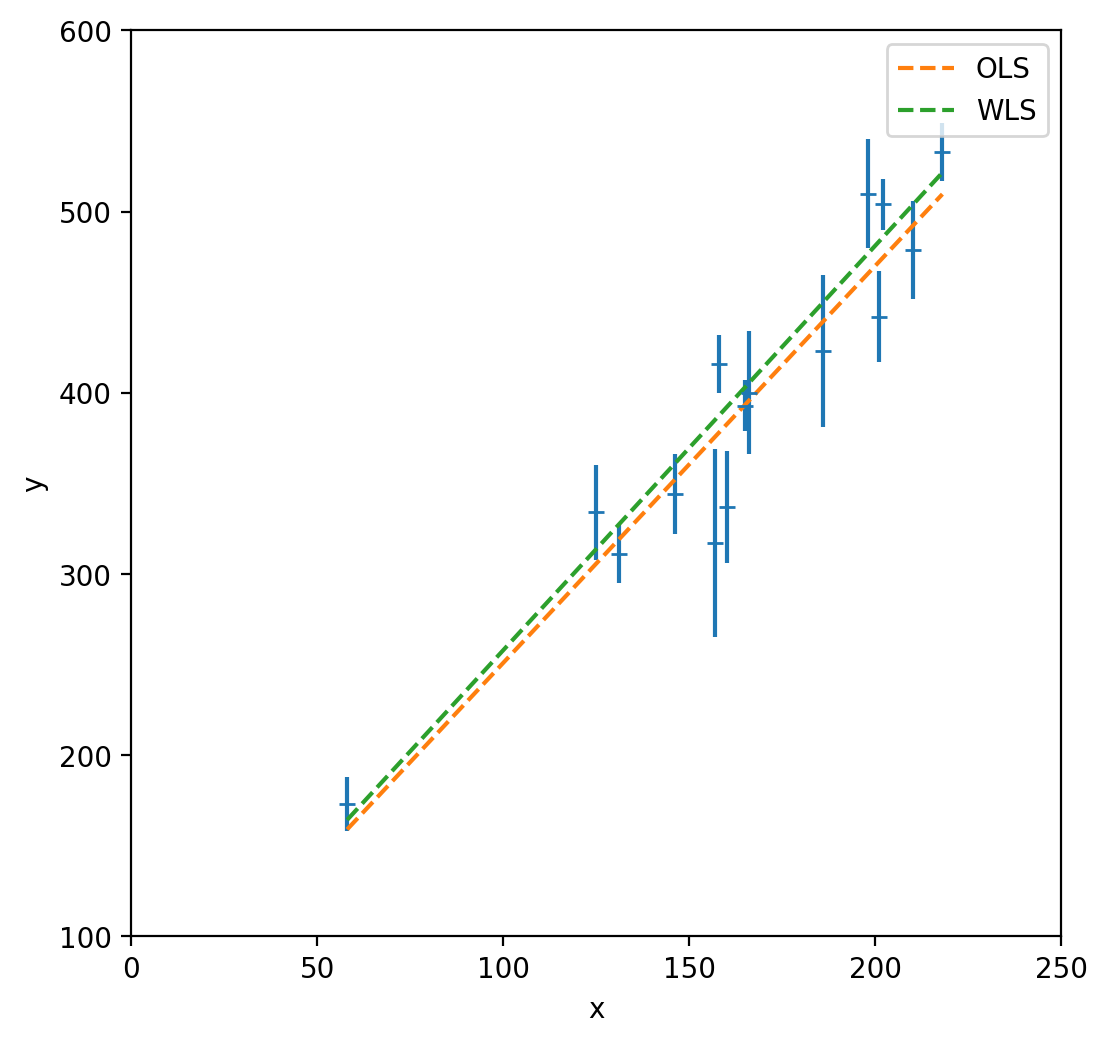

In [172]:
fig = plt.figure(figsize=[6,6],dpi=200)
plt.errorbar(xdata,ydata,dydata,fmt='_')
plt.plot(xdata,fun(xdata,xOLS),'--',label='OLS')
plt.plot(xdata, fun(xdata, xWLS),'--' ,label='WLS')
plt.legend()
plt.xlim((0,250))
plt.ylim((100,600))
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('least-square.jpeg',dpi=200)
plt.show()